# Context

In this notebook we will do some exploratory data analysis using bivariate and multivariate analysis

# Load packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency



pd.options.display.max_columns = 100
pd.options.display.max_rows = 100


# Load data

using relative paths

In [131]:
filename = "bivariate_jhonattan.ipynb" # Current file name
print(f'Current file name: {filename}\n')
print(f'Current absolute path: {os.getcwd()}\n')

# Specify the paths, relative to the current file
NOTEBOOKS_DIR = os.path.dirname(os.path.dirname(os.path.abspath(filename)))
BASE_DIR = os.path.dirname(NOTEBOOKS_DIR)
DATA_DIR = os.path.join(BASE_DIR, "Data")
OUTPUT_DIR = os.path.join(DATA_DIR, "output_data")

print(f'BASE_DIR: {BASE_DIR}')
print(f'DATA_DIR: {DATA_DIR}')
print(f'OUTPUT_DIR: {OUTPUT_DIR}')

Current file name: bivariate_jhonattan.ipynb

Current absolute path: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\notebooks\bivariate_analysis

BASE_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1
DATA_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data
OUTPUT_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data\output_data


In [132]:
df = pd.read_excel(os.path.join(OUTPUT_DIR,"hallazgos_clean.xlsx" )).iloc[:,1:]
df.head(2)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,zona,regional,distance_to_capital,is_rural,fecha_desembolso,visita_analista_credito,dia_semana_desembolso,dia_mes_desembolso,mes_desembolso,dias_desde_visita_a_desembolso,desembolso_fin_de_semana,desembolso_fin_de_mes,calificacion_cartera,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,12,4,10,0,2021-06-11,NaT,4.0,11.0,6.0,NaN,0,0,Si,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,1,1,5,0,2021-06-15,2021-06-08,1.0,15.0,6.0,7.0,0,0,No,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


# Bivariate analysis

## monto v año

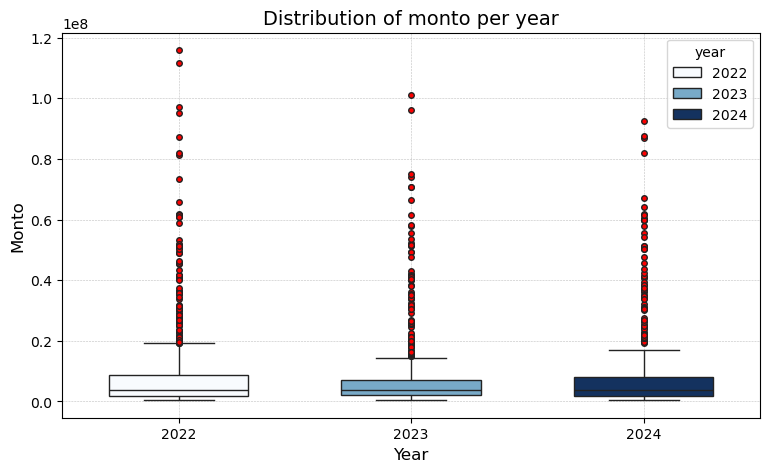

In [133]:
# Boxplot - monto per risk

plt.figure(figsize=(9, 5))
sns.boxplot(x=df['year'], y=df['monto'], palette="Blues", linewidth=1, width=0.6,hue=df['year'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))


plt.title("Distribution of monto per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monto", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)


plt.show()

In [134]:
# Lets check the monto per riesgo level

df.groupby(by="year").agg(
    {
        "monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

monto                                                        
         #     min       Q 10      Promedio        Q 90        max
year                                                              
2022  1285  400000  1011920.0  8.544114e+06  25685800.0  115832618
2023  1023  400000  1424283.4  7.108125e+06  13699954.0  100983196
2024   608  400000   600000.0  8.508897e+06  21094315.2   92506564

## monto v riesgo

In [135]:
# outliers monto

# Q1, Q3 & IQR
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


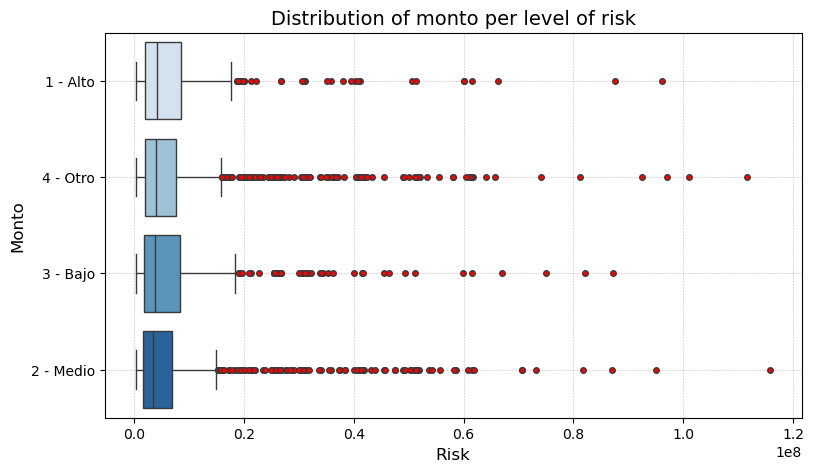

In [136]:
# Boxplot - monto per risk

plt.figure(figsize=(9, 5))
sns.boxplot(y=df['riesgo'], x=df['monto'], palette="Blues", linewidth=1, width=0.8,hue=df['riesgo'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of monto per level of risk", fontsize=14)
plt.xlabel("Risk", fontsize=12)
plt.ylabel("Monto", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.legend().remove()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


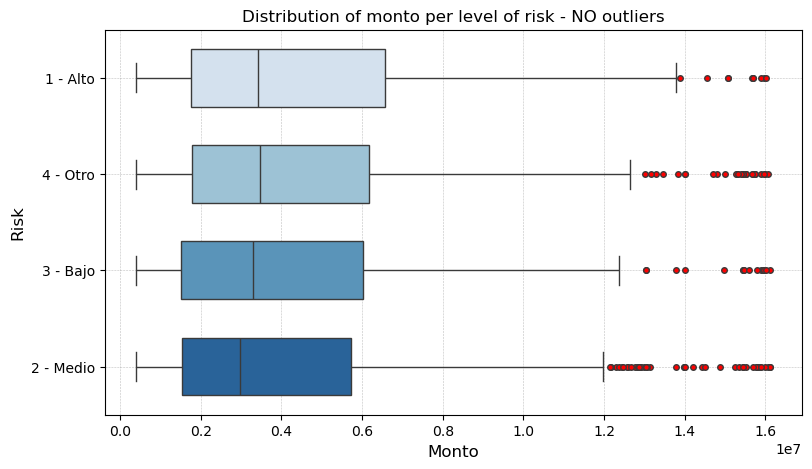

In [ ]:
# Boxplot - monto per risk WITHOUT OUTLIERS
temp = df[df["monto"]<upper_limit]

plt.figure(figsize=(9, 5))
sns.boxplot(x=temp['monto'], y=temp['riesgo'], palette="Blues", linewidth=1, width=0.6,hue=temp['riesgo'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of monto per level of risk - NO outliers", fontsize=12)
plt.xlabel("Monto", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.legend().remove()

plt.show()

## monto v actividad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


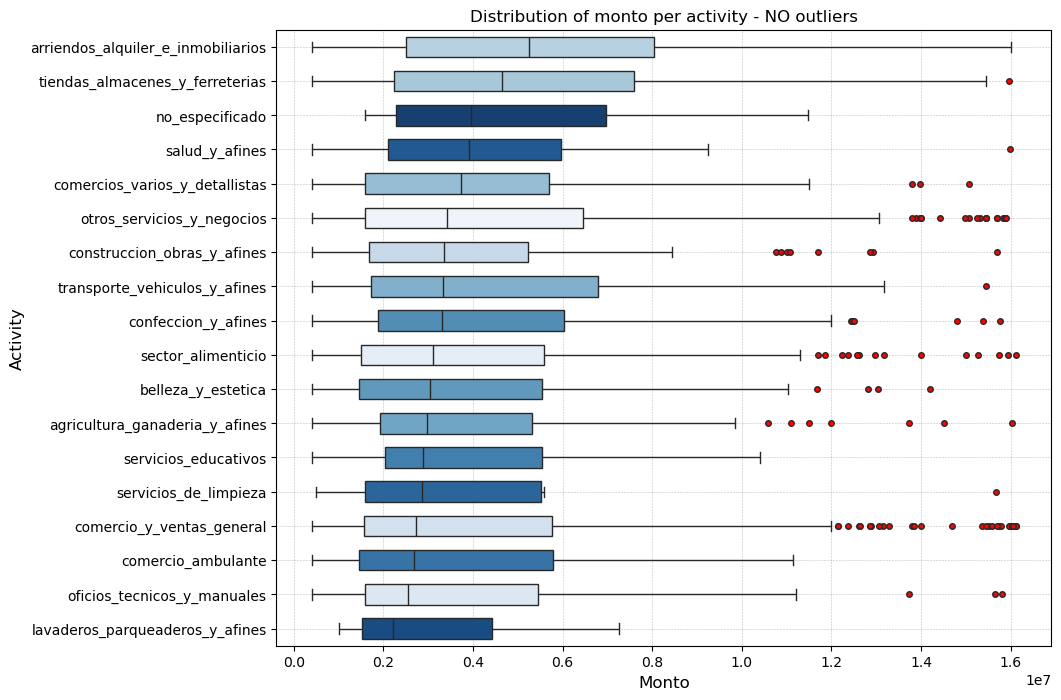

In [138]:
# Boxplot - monto per activity WITHOUT OUTLIERS

temp = df[df["monto"]<upper_limit]

order = temp.groupby("actividad_v2")["monto"].median().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.boxplot(x=temp['monto'], y=temp['actividad_v2'], order=order,
            palette="Blues", linewidth=1, width=0.6,hue=temp['actividad_v2'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of monto per activity - NO outliers", fontsize=12)
plt.xlabel("Monto", fontsize=12)
plt.ylabel("Activity", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.legend().remove()

plt.show()

## actividad v riesgo

In [139]:
print("Frequency of audit´s risk per activity:\n")

cross_tab = pd.crosstab(df.actividad_v2,df.riesgo,margins=True).sort_values(by="All",ascending=False)
cross_tab

Frequency of audit´s risk per activity:



riesgo,1 - Alto,2 - Medio,3 - Bajo,4 - Otro,All
actividad_v2,,,,,
All,325,1084,423,1084,2916
comercio_y_ventas_general,70,224,100,199,593
otros_servicios_y_negocios,59,198,70,162,489
sector_alimenticio,37,155,67,150,409
tiendas_almacenes_y_ferreterias,22,73,37,70,202
oficios_tecnicos_y_manuales,26,68,22,72,188
agricultura_ganaderia_y_afines,25,74,15,71,185
belleza_y_estetica,18,61,20,59,158
confeccion_y_afines,12,46,27,55,140


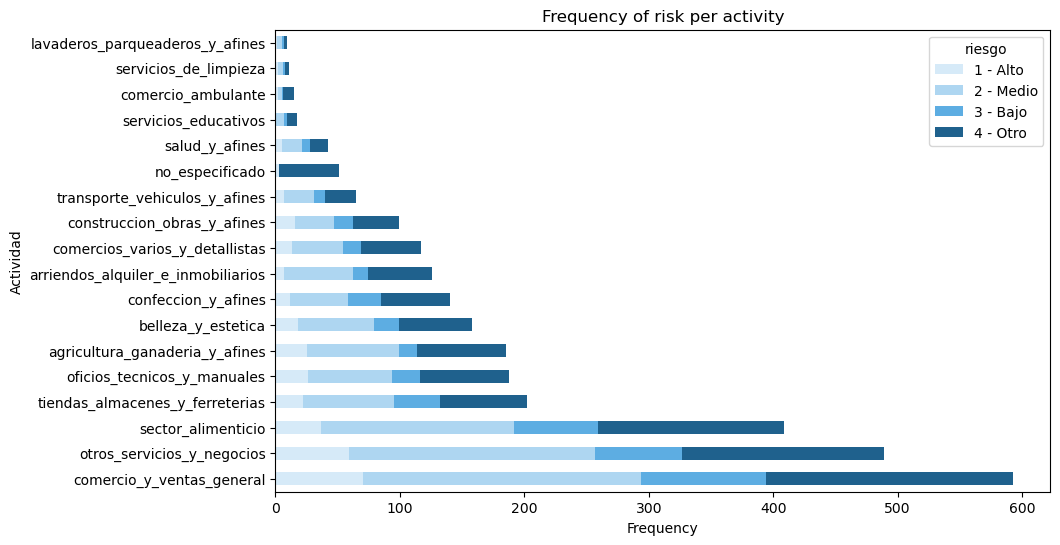

In [140]:
colors= ["#D6EAF8","#AED6F1", "#5DADE2", "#1F618D"]
cross_tab.drop("All",axis=0).drop("All",axis=1).plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
plt.title(f'Frequency of risk per activity')
plt.ylabel('Actividad')
plt.xlabel('Frequency')
plt.show()

In [141]:
print("Percentage of audit´s risk per activity:\n")

cross_table = (pd.crosstab(df.actividad_v2,df.riesgo,normalize="index")*100)
cross_table = cross_table.apply(lambda x: round(x,1)).sort_values(by="1 - Alto",ascending=False)
cross_table

Percentage of audit´s risk per activity:



riesgo,1 - Alto,2 - Medio,3 - Bajo,4 - Otro
actividad_v2,,,,
servicios_de_limpieza,18.2,36.4,18.2,27.3
construccion_obras_y_afines,16.2,31.3,15.2,37.4
oficios_tecnicos_y_manuales,13.8,36.2,11.7,38.3
agricultura_ganaderia_y_afines,13.5,40.0,8.1,38.4
comercio_ambulante,13.3,20.0,6.7,60.0
otros_servicios_y_negocios,12.1,40.5,14.3,33.1
salud_y_afines,11.9,38.1,16.7,33.3
comercio_y_ventas_general,11.8,37.8,16.9,33.6
belleza_y_estetica,11.4,38.6,12.7,37.3


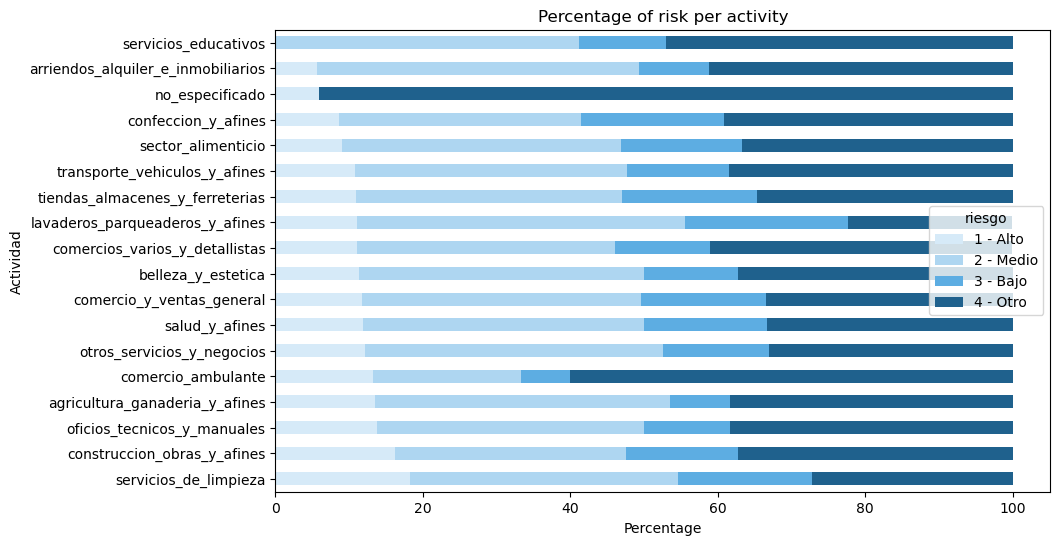

In [142]:
colors= ["#D6EAF8","#AED6F1", "#5DADE2", "#1F618D"]
cross_table.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
plt.title(f'Percentage of risk per activity')
plt.ylabel('Actividad')
plt.xlabel('Percentage')
plt.show()

In [143]:
print("Percentage of risk (binary) per activity:\n")

cross_table = (pd.crosstab(df.actividad_v2,df.riesgo_bin,normalize="index")*100)
cross_table = cross_table.apply(lambda x: round(x,1)).sort_values(by=1,ascending=False)
cross_table

Percentage of risk (binary) per activity:



riesgo_bin,0,1
actividad_v2,,
lavaderos_parqueaderos_y_afines,22.2,77.8
servicios_de_limpieza,27.3,72.7
otros_servicios_y_negocios,33.1,66.9
salud_y_afines,33.3,66.7
comercio_y_ventas_general,33.6,66.4
tiendas_almacenes_y_ferreterias,34.7,65.3
sector_alimenticio,36.7,63.3
belleza_y_estetica,37.3,62.7
construccion_obras_y_afines,37.4,62.6


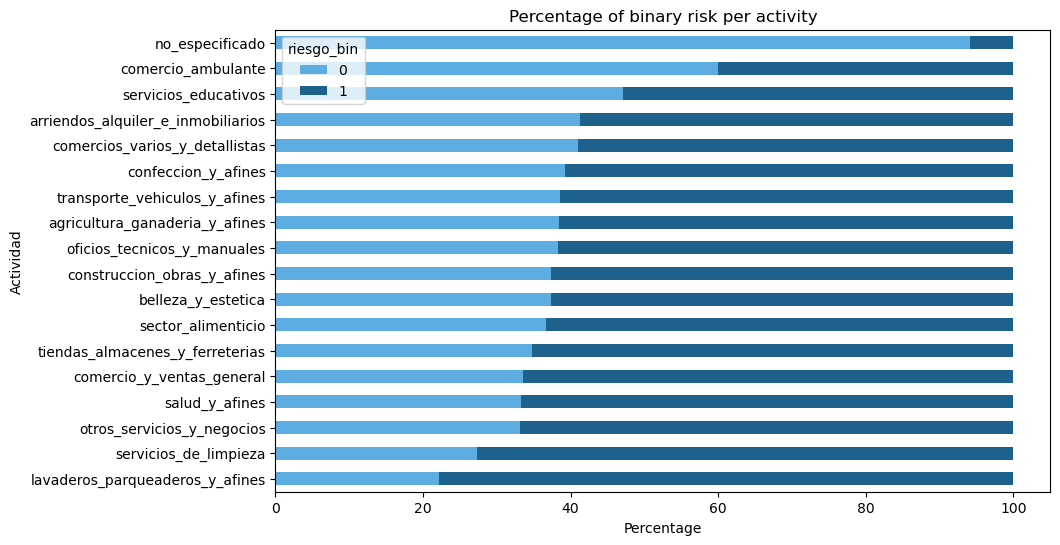

In [144]:
colors= ["#5DADE2", "#1F618D"]
cross_table.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
plt.title(f'Percentage of binary risk per activity')
plt.ylabel('Actividad')
plt.xlabel('Percentage')
plt.show()

### chi-square test

In [145]:
chi2, p, dof, expected = chi2_contingency(cross_tab.drop("All",axis=0).drop("All",axis=1))
print(f'Chi-square: {chi2}, p-value: {p}')
if p < 0.05:
    print('There is a significant association between the variables.')
else:
    print('No significant association was found between the variables.')

Chi-square: 119.72091749164116, p-value: 1.8803444232488228e-07
There is a significant association between the variables.


## actividad v riesgo v monto

Mean of monto(*10^6) per audit's risk per activity:



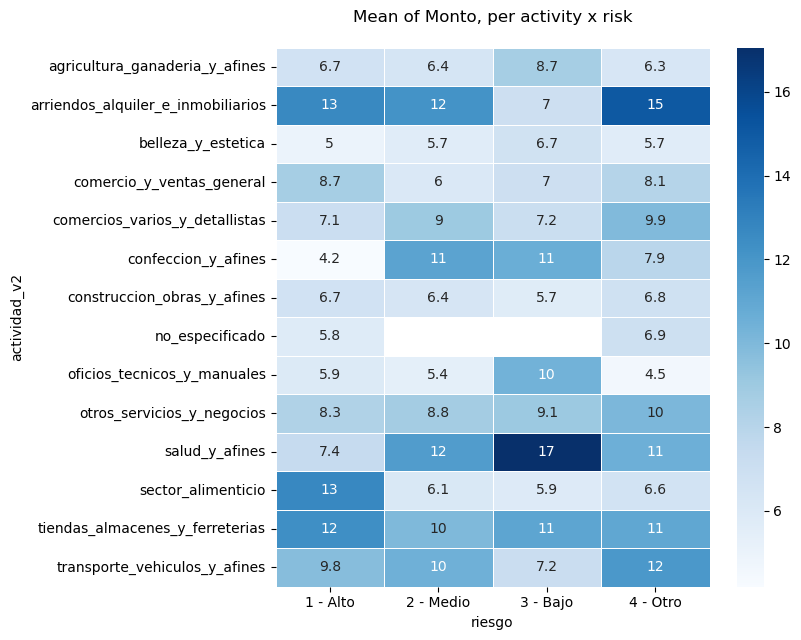

In [159]:
print("Mean of monto(*10^6) per audit's risk per activity:\n")

# Drop activities with low frequencies
activities = cross_tab.iloc[0:-4,:].drop("All",axis=0).index
temp = df[df["actividad_v2"].isin(activities)]

# Crosstab and heatmap 
monto = temp.monto.apply(lambda x: x/1000000)
cross_table = pd.crosstab(temp.actividad_v2,temp.riesgo,values=monto,aggfunc="mean").apply(lambda x: round(x,2))
cross_table

plt.figure(figsize=(7,7))
sns.heatmap(cross_table,annot=True, cmap="Blues", linewidths=0.5)
plt.title("Mean of Monto, per activity x risk\n")
plt.show()